In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")

In [3]:
df.drop(columns=['ID#'], axis=1, inplace=True)

In [4]:
print(df.dtypes)

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

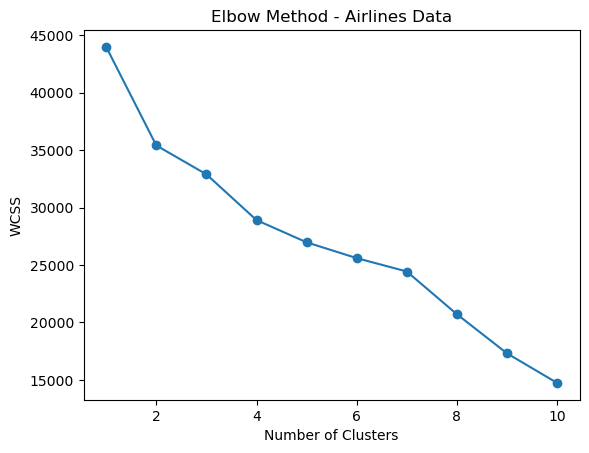

In [7]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method - Airlines Data")
plt.show()

In [8]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

print(df.groupby('KMeans_Cluster').mean())

                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0                68022.381152  377.851309   1.633508   1.023037   1.000000   
1               147282.027115  127.069414   4.146421   1.003254   1.052061   
2                44098.164939   46.327992   1.344486   1.015551   1.000471   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               11078.913089    11.972775         978.223037         2.854450   
1               50995.211497    21.040130         675.880694         2.058568   
2                5166.961828     7.334119         133.081056         0.409519   

                Days_since_enroll    Award?  
KMeans_Cluster                               
0                     4250.027225  0.943455  
1                     5066.104121  0.629067  
2                  

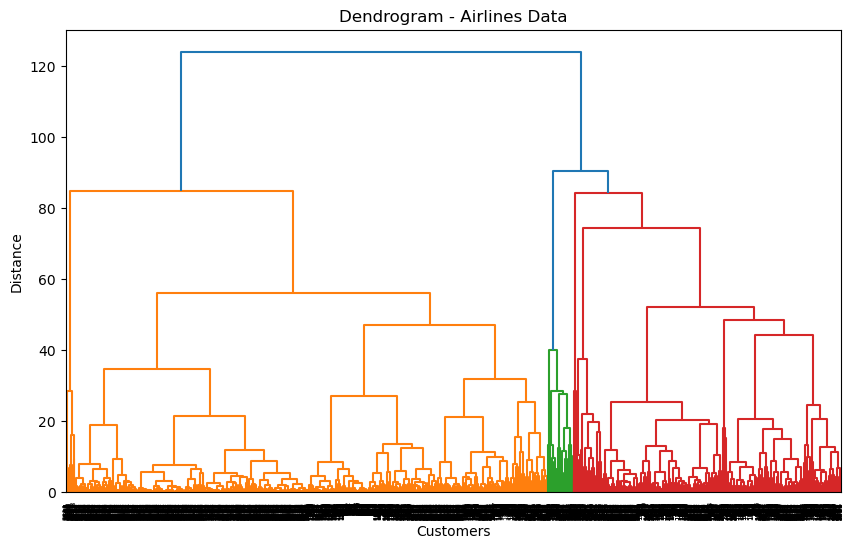

In [10]:
# Hierarchical Clustering
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram - Airlines Data")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

df['Hierarchical_Cluster'] = fcluster(linked, 3, criterion='maxclust')

In [11]:
# Create clusters from dendrogram
df['Hierarchical_Cluster'] = fcluster(linked, 3, criterion='maxclust')

print(df['Hierarchical_Cluster'].value_counts())

Hierarchical_Cluster
1    2489
3    1380
2     130
Name: count, dtype: int64
